In [1]:
import pertpy as pt
import scanpy as sc
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# SNAKEMAKE benchmark output format
# colname	type (unit)	description
# s	float (seconds)	Running time in seconds
# h:m:s	string (-)	Running time in hour, minutes, seconds format
# max_rss	float (MB)	Maximum "Resident Set Size”, this is the non-swapped physical memory a process has used.
# max_vms	float (MB)	Maximum “Virtual Memory Size”, this is the total amount of virtual memory used by the process
# max_uss	float (MB)	“Unique Set Size”, this is the memory which is unique to a process and which would be freed if the process was terminated right now.
# max_pss	float (MB)	“Proportional Set Size”, is the amount of memory shared with other processes, accounted in a way that the amount is divided evenly between the processes that share it (Linux only)
# io_in	float (MB)	the number of MB read (cumulative).
# io_out	float (MB)	the number of MB written (cumulative).
# mean_load	float (-)	CPU usage over time, divided by the total running time (first row)
# cpu_time	float(-)	CPU time summed for user and system

In [3]:
tool_dfs = {}
tools = ['augur_pertpy', 'augur_original', 'cinemaot_pertpy', 'cinemaot_original', 
         'guide_assignment', 'milo_pertpy', 'pert_space', "mixscape_pertpy", 
         "drug2cell_pertpy", "drug2cell_original", "sccoda_pertpy", "sccoda_original"]
tools_query = ['augur.*.pertpy.*', 'augur.*.original.*', 'cinemaot.*.pertpy.*', 'cinemaot.*.original.*', 
               'guide_assignment*', 'milo.*.pertpy.*', 'pert_space*', 'mixscape.pertpy*', 
               "drug2cell.*.pertpy*", "drug2cell.*.original*", "sccoda.*.pertpy*", "sccoda.*.original*"]
for tool, query in zip(tools, tools_query):
    dats = {}
    for file in Path('snakemake/benchmarks/').rglob(query):
        data = pd.read_csv(file, sep='\t')
        n_obs = int(file.stem.split('.')[1])
        if n_obs != 0:
            dats[n_obs] = data
    try:
        df = pd.concat(dats)
        df = pd.concat(dats)
        df.index = df.index.droplevel(1)
        df.sort_index(inplace=True)
        tool_dfs[tool] = df
    except ValueError:
        print(f"No data for {tool}")

No data for mixscape_pertpy
No data for drug2cell_original
No data for sccoda_pertpy
No data for sccoda_original


In [4]:
df = pd.concat(tool_dfs, axis=0).reset_index(level=0).rename(columns={'level_0': 'tool'})
df.index.name = 'n_obs'

In [5]:
len(df)

147

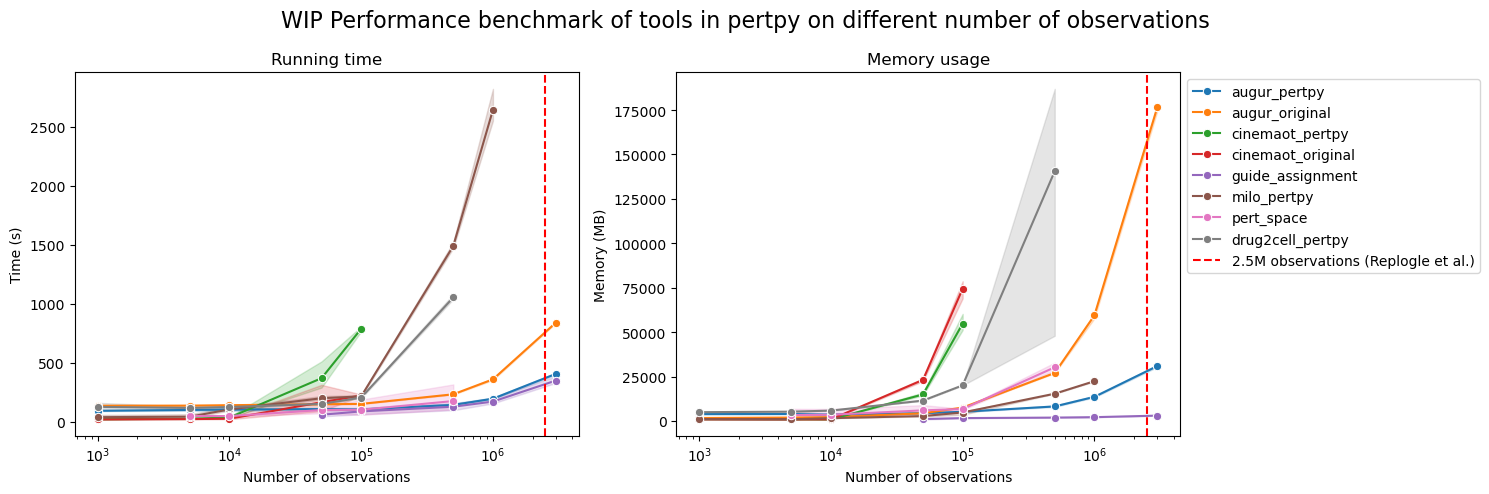

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
ax = axs[0]
sns.lineplot(data=df, x='n_obs', y='s', ax=ax, marker='o', hue='tool')
ax.set_ylabel('Time (s)')
ax.set_title('Running time')

ax = axs[1]
sns.lineplot(data=df, x='n_obs', y='max_rss', ax=ax, marker='o', hue='tool')
ax.set_ylabel('Memory (MB)')
ax.set_title('Memory usage')

for ax in axs:
    ax.set_xlabel('Number of observations')
    ax.set_xscale('log')
    ax.axvline(x=2.5e6, color='red', linestyle='--', label='2.5M observations (Replogle et al.)')
    if ax==axs[-1]:
        ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    else:
        ax.legend().remove()
plt.suptitle('WIP Performance benchmark of tools in pertpy on different number of observations', fontsize=16)
plt.tight_layout()

plt.show()

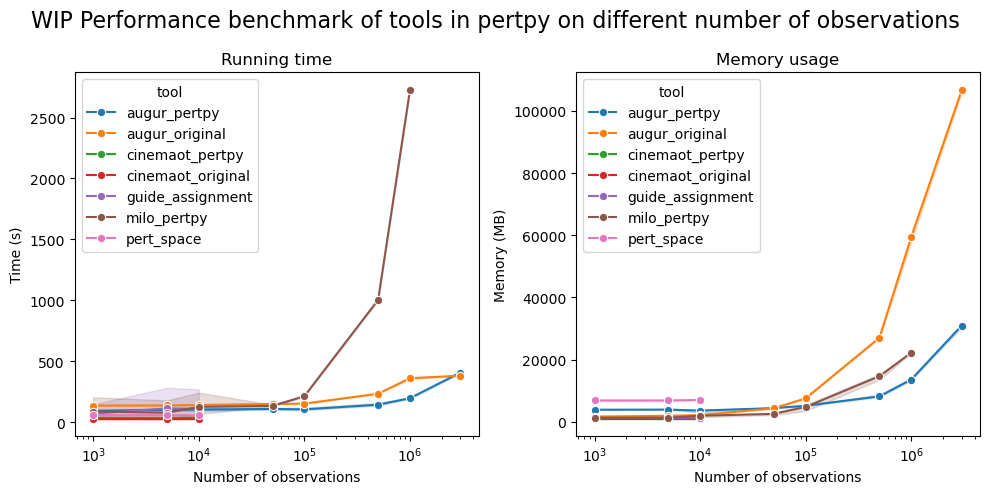

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
ax = axs[0]
sns.lineplot(data=df, x='n_obs', y='s', ax=ax, marker='o', hue='tool')
ax.set_xlabel('Number of observations')
ax.set_ylabel('Time (s)')
ax.set_title('Running time')
ax.set_xscale('log')

ax = axs[1]
sns.lineplot(data=df, x='n_obs', y='max_rss', ax=ax, marker='o', hue='tool')
ax.set_xlabel('Number of observations')
ax.set_ylabel('Memory (MB)')
ax.set_title('Memory usage')
ax.set_xscale('log')
plt.suptitle('WIP Performance benchmark of tools in pertpy on different number of observations', fontsize=16)
plt.tight_layout()
plt.show()

In [31]:

import pertpy as pt

In [32]:
adata = pt.dt.zhang_2021()

In [34]:
adata

AnnData object with n_obs × n_vars = 1000 × 27085
    obs: 'Sample', 'Patient', 'Origin', 'Tissue', 'Efficacy', 'Group', 'Treatment', 'Number of counts', 'Number of genes', 'Major celltype', 'Cluster'

In [ ]:
n_obs = 1000
sc.pp.sample(adata, n=n_obs, rng=0, replace=True)

/home/peidli/miniconda3/envs/pertpy_dev/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/peidli/miniconda3/envs/pertpy_dev/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [35]:
bdata